### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))
print("Matrix:\n", m)

# row means
row_means = np.mean(m,1)
print("")
for i in range(np.size(row_means)):
    print("Mean of the matrix elements over row " + str(i) + ":", row_means[i])

# column means
column_means = np.mean(m,0)
print("")
for i in range(np.size(column_means)):
    print("Mean of the matrix elements over column " + str(i) + ":", column_means[i])

# overall mean
print("\nOverall mean of the matrix elements:", np.mean(m))

Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Mean of the matrix elements over row 0: 1.5
Mean of the matrix elements over row 1: 5.5
Mean of the matrix elements over row 2: 9.5

Mean of the matrix elements over column 0: 4.0
Mean of the matrix elements over column 1: 5.0
Mean of the matrix elements over column 2: 6.0
Mean of the matrix elements over column 3: 7.0

Overall mean of the matrix elements: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print("u =", u)
print("v =", v)

# using the function 'outer' in numpy
outer1 = np.outer(u,v)
print("\nOuter product of 'u' and 'v' using the function 'outer' in numpy:\n", outer1)

# using a list comprehension
outer2 = np.array([u_i*v_i for u_i in u for v_i in v]).reshape(len(u),len(v))
print("\nOuter product of 'u' and 'v' using a list comprehension:\n", outer2)

# using numpy broadcasting operations
outer3 = u.reshape(-1,1)*v   # '-1' means 'as many rows as needed'
print("\nOuter product of 'u' and 'v' using numpy broadcasting operations:\n", outer3)

u = [1 3 5 7]
v = [2 4 6 8]

Outer product of 'u' and 'v' using the function 'outer' in numpy:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product of 'u' and 'v' using a list comprehension:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product of 'u' and 'v' using numpy broadcasting operations:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
import numpy.random as npr
npr.seed(10)

matrix = npr.rand(10,6)
print("Original matrix:\n", matrix)

mask = (matrix < 0.1)
print("\nMask:\n", mask)
for i in range(len(matrix)):   # checking all the rows of 'matrix'
    if np.any(mask[i]) == True:   # checking if in the i-th row of 'matrix' there is at least one entry less than 0.1
        matrix[i] = 0   # zeroing all the rows that satisfy the previous condition
print("\nModified matrix:\n", matrix)

Original matrix:
 [[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665]
 [0.19806286 0.76053071 0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607 0.72175532 0.29187607]
 [0.91777412 0.71457578 0.54254437 0.14217005 0.37334076 0.67413362]
 [0.44183317 0.43401399 0.61776698 0.51313824 0.65039718 0.60103895]
 [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935 0.30070006]
 [0.11398436 0.82868133 0.04689632 0.62628715 0.54758616 0.819287  ]
 [0.19894754 0.8568503  0.35165264 0.75464769 0.29596171 0.88393648]
 [0.32551164 0.1650159  0.39252924 0.09346037 0.82110566 0.15115202]
 [0.38411445 0.94426071 0.98762547 0.45630455 0.82612284 0.25137413]]

Mask:
 [[False  True False False False False]
 [False False False  True False False]
 [ True False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False  True False]
 [False False  True False False False]
 [False Fa

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Original array:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.

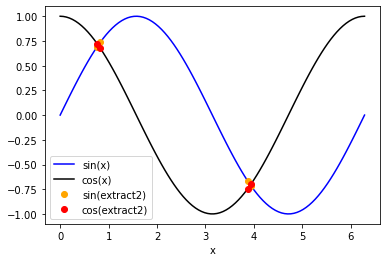

In [4]:
x = np.linspace(0, 2*np.pi, 100)
print("Original array:\n", x)

# extract every 10 elements using slice notation
extract1 = x[::10]
print("\nArray obtained by extracting every 10 elements using slice notation:\n", extract1)

# reverse the array using slice notation
reverse = x[::-1]
print("\nOriginal array reversed using slice notation:\n", reverse)

# extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
mask = (abs(np.sin(x) - np.cos(x)) < 0.1)
extract2 = x[mask]
print("\nArray obtained by extracting elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1:\n", extract2)

# make a plot showing the sin and cos functions and indicate where they are close
import matplotlib.pyplot as plt
%matplotlib inline
print("\nPlotting (x, sin(x)), (x, cos(x)):")
plt.plot(x, np.sin(x), color='blue', label='sin(x)')
plt.plot(x, np.cos(x), color='black', label='cos(x)')
plt.plot(extract2, np.sin(extract2), 'o', color='orange', label='sin(extract2)')
plt.plot(extract2, np.cos(extract2), 'o', color='red', label='cos(extract2)')
plt.xlabel('x')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
x_row = np.arange(1,11)
print("x_row =", x_row)
x_column = x_row.reshape(-1,1)   # '-1' means 'as many rows as needed'
print("\nx_column =\n", x_column)
table = x_column*x_row
print("\n10 by 10 multiplication table:\n", table)

# trace
trace = np.trace(table)
print("\nTrace of the 10 by 10 multiplication table:", trace)

# anti-diagonal
mask = np.zeros_like(table, dtype=bool)
for i in range(np.size(mask,0)):
    mask[i, np.size(mask,1)-1-i] = True
antidiagonal = table[mask]
print("\nAnti-diagonal of the 10 by 10 multiplication table:", antidiagonal)

# diagonal offset by 1 upwards
diagonal_offset = np.diagonal(table, offset=1)
print("\nDiagonal offset by 1 upwards of the 10 by 10 multiplication table:", diagonal_offset)

x_row = [ 1  2  3  4  5  6  7  8  9 10]

x_column =
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

10 by 10 multiplication table:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the 10 by 10 multiplication table: 385

Anti-diagonal of the 10 by 10 multiplication table: [10 18 24 28 30 30 28 24 18 10]

Diagonal offset by 1 upwards of the 10 by 10 multiplication table: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
positions_row = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print("Row of positions:\n", positions_row)
positions_column = positions_row.reshape(-1,1)   # '-1' means 'as many rows as needed'
print("\nColumn of positions:\n", positions_column)
grid = abs(positions_row - positions_column)   # using broadcasting to create the grid of distances
print("\nGrid of distances expressed in miles:\n", grid)

# converting in km
mile_in_km = 1.6   # 1 mile expressed in kilometers
print("\nGrid of distances expressed in kilometers:\n", mile_in_km*grid)

Row of positions:
 [   0  198  303  736  871 1175 1475 1544 1913 2448]

Column of positions:
 [[   0]
 [ 198]
 [ 303]
 [ 736]
 [ 871]
 [1175]
 [1475]
 [1544]
 [1913]
 [2448]]

Grid of distances expressed in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Grid of distances expressed in kilometers:
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Prime numbers in the 0-99 range:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Execution time with N = 99 : 0.0005669000000001478 seconds

Execution time with N = 500 : 0.009405799999999909 seconds

Execution time with N = 1000 : 0.0314376999999999 seconds

Execution time with N = 1500 : 0.06563169999999996 seconds

Execution time with N = 2000 : 0.10755910000000002 seconds

Execution time with N = 2500 : 0.15826479999999998 seconds

Execution time with N = 3000 : 0.22261640000000016 seconds

Execution time with N = 3500 : 0.29584959999999993 seconds

Execution time with N = 4000 : 0.38345509999999994 seconds

Execution time with N = 4500 : 0.4710939999999999 seconds

Execution time with N = 5000 : 0.5809204000000006 seconds

Execution time with N = 5500 : 0.7026030999999993 seconds

Execution time with N = 6000 : 0.8254039999999998 seconds

Execution time with N = 6500 : 0.9957580000000004 seconds

Execution time with N = 7000 : 1.0976406 seconds

Exec

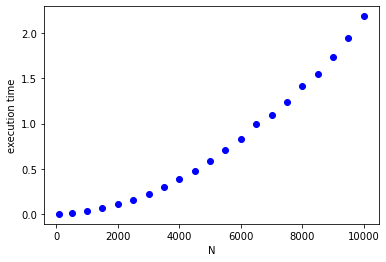


######################################################## SIEVE OF ERATOSTHENES ########################################################
Prime numbers in the 0-99 range:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Execution time with N = 99 : 0.00014420000000114896 seconds

Execution time with N = 2000 : 0.0021567000000004555 seconds

Execution time with N = 4000 : 0.005225599999999275 seconds

Execution time with N = 6000 : 0.009261000000002184 seconds

Execution time with N = 8000 : 0.013276699999998698 seconds

Execution time with N = 10000 : 0.016534800000002292 seconds

Execution time with N = 12000 : 0.02369300000000152 seconds

Execution time with N = 14000 : 0.028415800000001212 seconds

Execution time with N = 16000 : 0.03240810000000138 seconds

Execution time with N = 18000 : 0.03869850000000241 seconds

Execution time with N = 20000 : 0.045389799999998814 seconds

Execution time with N = 22000 : 0.049873599999997964 seconds

Execution time

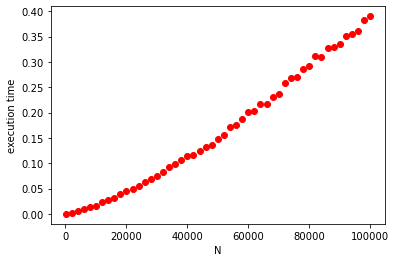

In [7]:
# defining the function 'primes(N)' which finds the prime numbers in the 0-N range and returns them in a numpy array
def primes(N):
    x = np.arange(N+1)   # numpy array of numbers in the 0-N range
    mask = np.ones_like(x, dtype=bool)   # initial hypothesis: all numbers within 'x' are prime
    mask[0], mask[1] = False, False   # 0 and 1 are not prime numbers!
    for i in range(2, len(x)):   # checking one by one if the numbers within 'x' (apart from 0 and 1) are prime
        for div in range(2, x[i]):   # checking if there is a divisor of 'x[i]' which is different from 1 and 'x[i]'
            if x[i]%div == 0:   # definition of divisor
                mask[i] = False
                break   # 'break' used to optimize performances: as soon as a divisor of 'x[i]' is found, the for loop in 'div' stops
    return x[mask]   # mask applied to 'x'

# preparing data
N = 99
Ns = []
comptimes = []

import time
start = time.perf_counter()
prime_numbers = primes(N)
stop = time.perf_counter()
comptime = stop - start
Ns.append(N)
comptimes.append(comptime)
print("Prime numbers in the 0-%d range:" % N)
print(prime_numbers)
print("\nExecution time with N =", N, ":", comptime, "seconds")

for i in range(20):
    N = 500 + (i*500)   # checking execution time for N in the 500-10000 range, step = 500
    start = time.perf_counter()
    prime_numbers = primes(N)
    stop = time.perf_counter()
    comptime = stop - start
    Ns.append(N)
    comptimes.append(comptime)
    print("\nExecution time with N =", N, ":", comptime, "seconds")

# plotting data
print("\nPlotting (N, comptime):")
plt.plot(Ns, comptimes, 'o', color='blue')
plt.xlabel('N')
plt.ylabel('execution time')
plt.show()

print("\n######################################################## SIEVE OF ERATOSTHENES ########################################################")
# defining the function 'primes_Erathostenes(N)' which finds the prime numbers in the 0-N range and returns them in a numpy array
def primes_Eratosthenes(N):
    x = np.arange(N+1)   # numpy array of numbers in the 0-N range
    mask = np.ones_like(x, dtype=bool)   # initial hypothesis: all numbers within 'x' are prime
    mask[0], mask[1] = False, False   # 0 and 1 are not prime numbers!
    for i in range(2, int(np.sqrt(N))+1):
        if mask[i] == True:
            for j in range(2*i, N+1):   # checking if there are multiples of 'i' within 'x'
                if j%i == 0:
                    mask[j] = False
    return x[mask]   # mask applied to 'x'                
    
# preparing data   
N = 99
Ns = []
comptimes = []

start = time.perf_counter()
prime_numbers = primes_Eratosthenes(N)
stop = time.perf_counter()
comptime = stop - start
Ns.append(N)
comptimes.append(comptime)
print("Prime numbers in the 0-%d range:" % N)
print(prime_numbers)
print("\nExecution time with N =", N, ":", comptime, "seconds")

for N in range(2000, 100001, 2000):   # checking execution time for N in the 2000-100000 range, step = 2000
    start = time.perf_counter()
    prime_numbers = primes_Eratosthenes(N)
    stop = time.perf_counter()
    comptime = stop - start
    Ns.append(N)
    comptimes.append(comptime)
    print("\nExecution time with N =", N, ":", comptime, "seconds")

# plotting data
print("\nPlotting (N, comptime):")
plt.plot(Ns, comptimes, 'o', color='red')
plt.xlabel('N')
plt.ylabel('execution time')
plt.show()

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Matrix of jumps (row = walker, column = step):
 [[-1 -1 -1 ... -1  1  1]
 [-1 -1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [ 1 -1  1 ...  1 -1 -1]
 [ 1 -1  1 ... -1 -1 -1]
 [ 1  1 -1 ...  1  1 -1]]

Matrix of walking distances (row = walker, column = step):
 [[ -1  -2  -3 ...   4   5   6]
 [ -1  -2  -1 ... -10  -9 -10]
 [ -1   0   1 ...  20  21  20]
 ...
 [  1   0   1 ...  16  15  14]
 [  1   0   1 ...   4   3   2]
 [  1   2   1 ... -16 -15 -16]]

Matrix of squared walking distances (row = walker, column = step):
 [[  1   4   9 ...  16  25  36]
 [  1   4   1 ... 100  81 100]
 [  1   0   1 ... 400 441 400]
 ...
 [  1   0   1 ... 256 225 196]
 [  1   0   1 ...  16   9   4]
 [  1   4   1 ... 256 225 256]]

Means of squared walking distances at each step:
 [  1.      2.028   3.04    3.904   4.936   5.84    7.024   8.136   9.264
   9.984  10.904  11.932  12.872  13.812  14.8    15.572  16.456  17.648
  18.696  19.552  20.088  20.54   21.44   22.008  23.136  24.852  25.648
  26.632  28

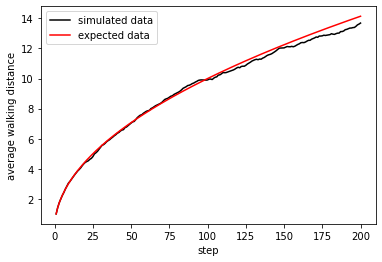

The simulated data are compatible with the theoretical predictions (in a 1D random walk the expected walking distance after N steps should be of the order of sqrt(N)).


In [8]:
n_walkers = 1000
n_steps = 200

# using 'randint' to create a 2D array of size 'n_walkers' x 'n_steps' with values -1 or 1
jumps = (-1)**npr.randint(0, 2, size=(n_walkers, n_steps))
print("Matrix of jumps (row = walker, column = step):\n", jumps)

# building the actual walking distances for each walker (i.e. another 2D array "summing on each row")
distances = jumps.copy()
for i in range(np.size(distances,0)):
    for j in range(1, np.size(distances,1)):
        distances[i,j] += distances[i,j-1]
print("\nMatrix of walking distances (row = walker, column = step):\n", distances)

# taking the square of 'distances' (elementwise)
distances_squared = distances**2
print("\nMatrix of squared walking distances (row = walker, column = step):\n", distances_squared)

# computing the mean of the squared distances at each step (i.e. the mean along the columns)
means = np.mean(distances_squared, axis=0)
print("\nMeans of squared walking distances at each step:\n", means)

# plotting data
print("\nPlotting (step, sqrt(mean)):")
steps = np.arange(1,n_steps+1)
plt.plot(steps, np.sqrt(means), color='black', label='simulated data')   # simulated data
plt.plot(steps, np.sqrt(steps), color='red', label='expected data')   # expected data
plt.xlabel('step')
plt.ylabel('average walking distance')
plt.legend()
plt.show()
print("The simulated data are compatible with the theoretical predictions (in a 1D random walk the expected walking distance after N steps should be of the order of sqrt(N)).")

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Data:
 [[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]

Years:
 [1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]

Population of hares over the years:
 [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]

Population of

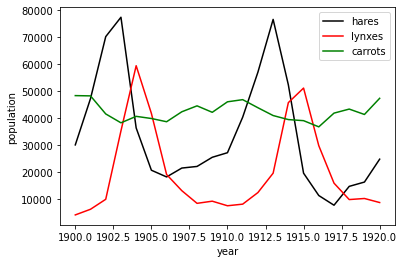


Main statistical properties of the population of hares:
sum = 715700.0
min = 7600.0
argmin = 17
mean = 34080.95238095238
median = 25400.0
std = 20897.906458089667

Main statistical properties of the population of lynxes:
sum = 423500.0
min = 4000.0
argmin = 0
mean = 20166.666666666668
median = 12300.0
std = 16254.591536908763

Main statistical properties of the population of carrots:
sum = 890400.0
min = 36700.0
argmin = 16
mean = 42400.0
median = 41800.0
std = 3322.5062255844787

Pearson correlation coefficients between the populations (row, column = (hares, lynxes, carrots)):
 [[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]
It seems that there is a non-negligible correlation (almost 70%) between the lynx population and the carrot population.

In the year 1900 the carrots population was the highest.
In the year 1901 the carrots population was the highest.
In the year 1902 the hares population was the highest.
In th

In [9]:
# loading data into a 2D array
data = np.loadtxt("populations.txt")
print("Data:\n", data)

# creating arrays out of the columns
years = np.array(data[:,0])
hares = np.array(data[:,1])
lynxes = np.array(data[:,2])
carrots = np.array(data[:,3])
names = ["hares", "lynxes", "carrots"]
populations = [hares, lynxes, carrots]

# printing arrays created out of the columns
print("\nYears:\n", years)
for name, population in zip(names, populations):
    print("\nPopulation of", name, "over the years:\n", population)

# plotting populations over the years
print("\nPlotting populations over the years:")
plt.plot(years, hares, color='black', label='hares')
plt.plot(years, lynxes, color='red', label='lynxes')
plt.plot(years, carrots, color='green', label='carrots')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

# computing the main statistical properties of each population
for name, population in zip(names, populations):
    print("\nMain statistical properties of the population of " + name + ":")
    for function in ['sum','min','argmin','mean','median','std']:
        print (function, "=", getattr(np, function)(population))
print("\nPearson correlation coefficients between the populations (row, column = (hares, lynxes, carrots)):\n", np.corrcoef(populations))
print("It seems that there is a non-negligible correlation (almost 70%) between the lynx population and the carrot population.\n")

# finding the species with the highest population year by year
argmaxs = np.argmax(data[:,1:], axis=1)
for year, argmax in zip(years, argmaxs):
    print("In the year", int(year), "the", names[argmax], "population was the highest.")